<h1> Body Fat prediction </h1>
<ul>
    <li> Exploratory Analysis </li>
    <li> Visualization </li>
    <li> Algorithm Optimization </li>
    <li> Presentation </li>
</ul>
<a href="https://www.kaggle.com/code/casper6290/bodyfat-prediction?fbclid=IwAR0Cn2Q_iYOLg5Cu4NlyB1ETGVUDF3O4Q4e3Dv5GZI4EVBiWtod4g8PcGFQ"> Reference </a>

In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        #Cong nghe
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/body-fat-prediction-dataset/bodyfat.csv


# Loading dataset

In [19]:
df=pd.read_csv('/kaggle/input/body-fat-prediction-dataset/bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# Exploratory data analysis & Visualisation 

In [20]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [22]:
df.shape

(252, 15)

In [23]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [24]:
y=df['BodyFat']
X=df.drop(['BodyFat'], axis=1)

In [25]:
X.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [26]:
y.head()

0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: BodyFat, dtype: float64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

In [28]:
q1=y.quantile(0.25)
median=y.quantile(0.5)
q3=y.quantile(0.75)
iqr=q3-q1
mean=sum(y)/y.shape[0]
print('First quartile: q1 = {}'.format(q1))
print('First quartile: median = {}'.format(median))
print('First quartile: q3 = {}'.format(q3))
print('First quartile: mean = {}'.format(mean))

First quartile: q1 = 12.475
First quartile: median = 19.2
First quartile: q3 = 25.3
First quartile: mean = 19.15079365079365


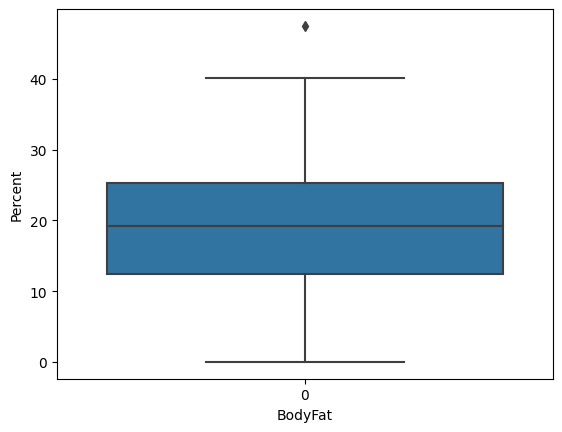

In [29]:
f=plt.plot(fig_size=(12, 12))
sb.boxplot(y)
f=plt.xlabel('BodyFat')
f=plt.ylabel('Percent')

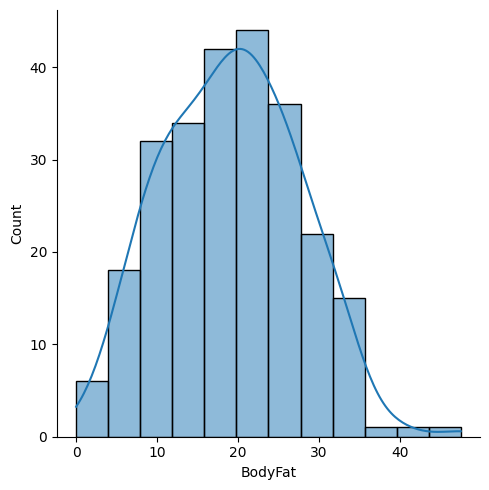

In [30]:
f=sb.displot(y, kde=True)

The distribution of bodyfat percentage in this dataset is not too skewed

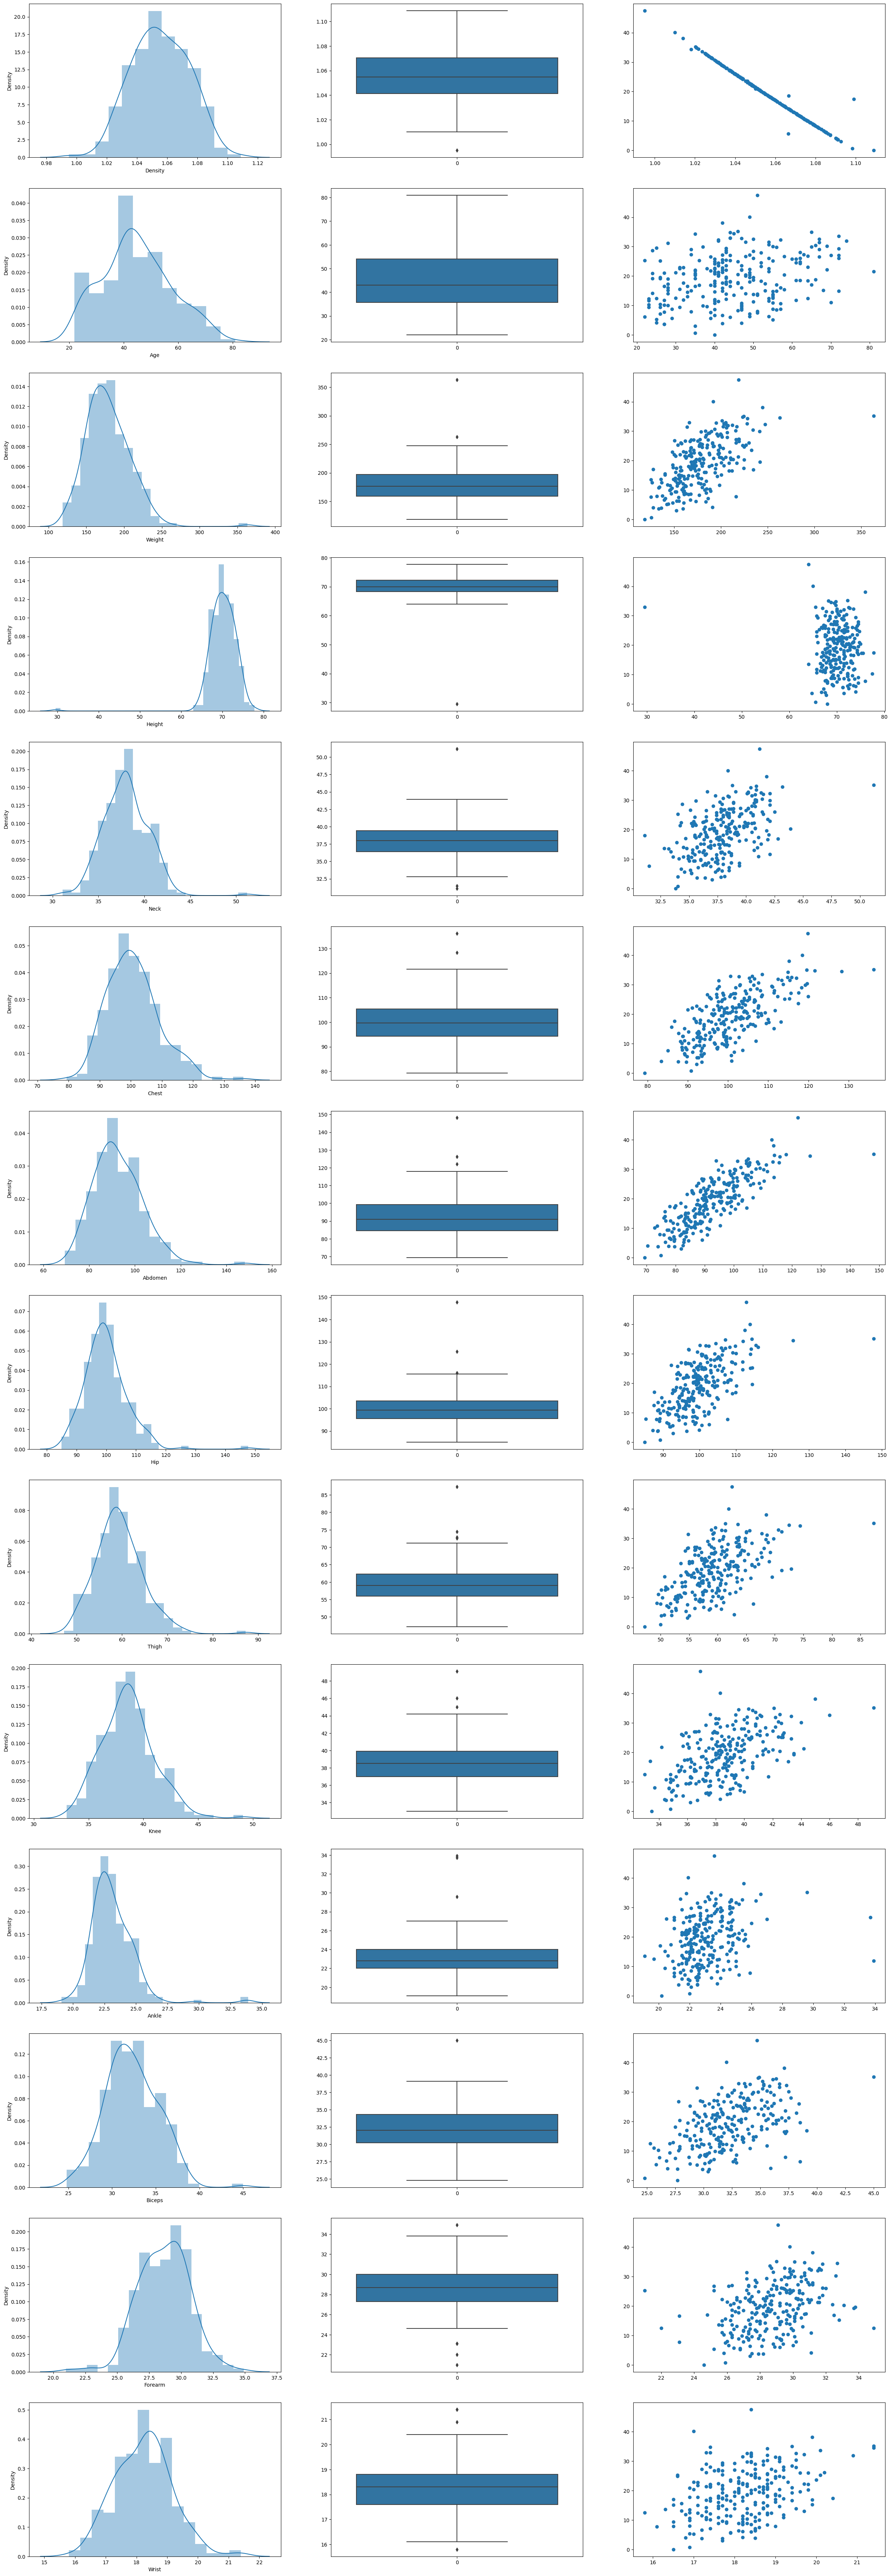

In [31]:
fig, ax = plt.subplots(14, 3, figsize=(30, 90))
for i, column in enumerate(X.columns):
    sb.distplot(X[column], ax=ax[i, 0])
    sb.boxplot(df[column], ax=ax[i, 1])
    ax[i, 2].scatter(X[column], y)

# Remove outliers

In [36]:
for column in X.columns:
    q1=X[column].quantile(0.25)
    q3=X[column].quantile(0.75)
    iqr=q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliersX = X[(X[column] < lower_bound) | (X[column] > upper_bound)]

In [41]:
X_no_outliers = X.drop(outliersX.index)
y_no_outliers = y.drop(outliersX.index)

In [42]:
q1=y.quantile(0.25)
q3=y.quantile(0.75)
iqr=q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliersy = y[(y < lower_bound) | (y > upper_bound)]

In [43]:
X_no_outliers = X_no_outliers.drop(outliersy.index)
y_no_outliers = y_no_outliers.drop(outliersy.index)

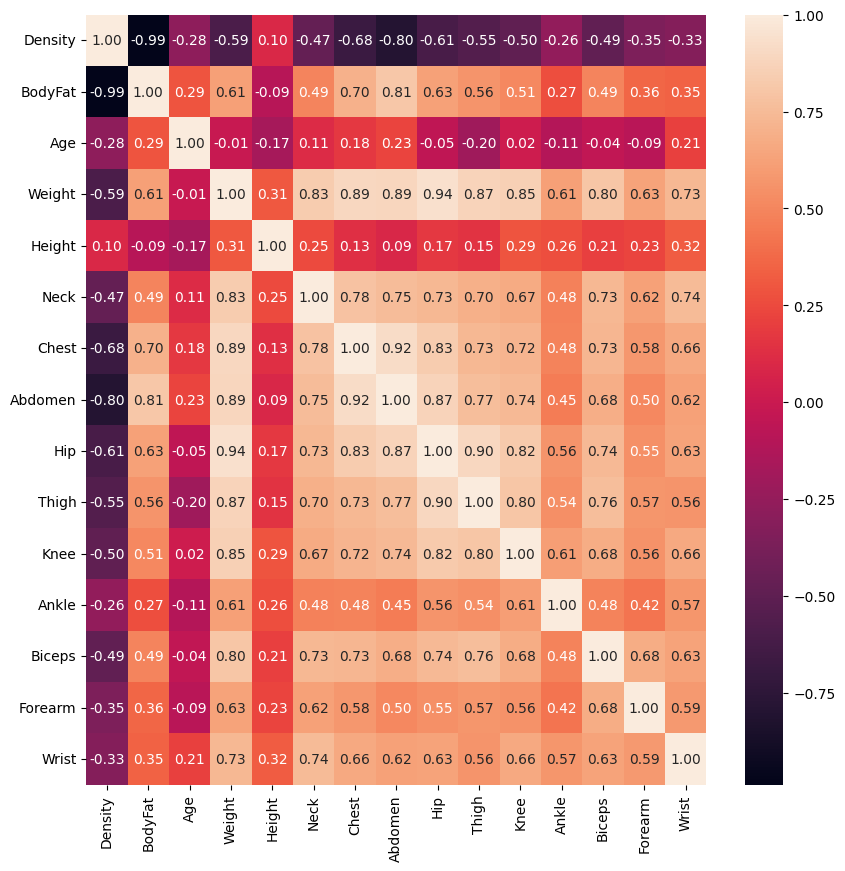

In [44]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sb.heatmap(corr, annot=True, fmt="0.2f")
plt.show()

# Model building & Optimisation

In [45]:
corr_to_bodyfat=corr["BodyFat"]

In [46]:
corr_to_bodyfat=corr_to_bodyfat.sort_values()
corr_to_bodyfat

Density   -0.987782
Height    -0.089495
Ankle      0.265970
Age        0.291458
Wrist      0.346575
Forearm    0.361387
Neck       0.490592
Biceps     0.493271
Knee       0.508665
Thigh      0.559608
Weight     0.612414
Hip        0.625201
Chest      0.702620
Abdomen    0.813432
BodyFat    1.000000
Name: BodyFat, dtype: float64

We will not include density in our model as it is not a readily available measurement

1. Feature engineering
    </br>- Find formulas for new variables.
2. How many feature to include
3. Which model:
    </br>- Linear regression 
    </br>- Decision tree 
    </br>- K mean 
    </br>- XGboost 

In [51]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_temp, y_train, y_temp = train_test_split(X_no_outliers, y_no_outliers, test_size=0.4)

In [81]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

In [82]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
gradient_boosting = GradientBoostingRegressor().fit (X_train, y_train)

In [118]:
from sklearn.metrics import r2_score, mean_squared_error

In [128]:
model_name=['linear_reg', 'random_forest', 'gradient_boosting', 'XGboost']
mse={}

In [122]:
import xgboost as xgb

In [134]:
XGboost = xgb.XGBRegressor()
XGboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [135]:
linear_reg_mse = mean_squared_error(y_test, linear_reg.predict(X_test))
random_forest_mse = mean_squared_error(y_test, random_forest.predict(X_test))
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting.predict(X_test))
XGboost_mse = mean_squared_error(y_test, XGboost.predict(X_test))

# Evaluation

plotting the mean squared error on the test set for each model

<BarContainer object of 4 artists>

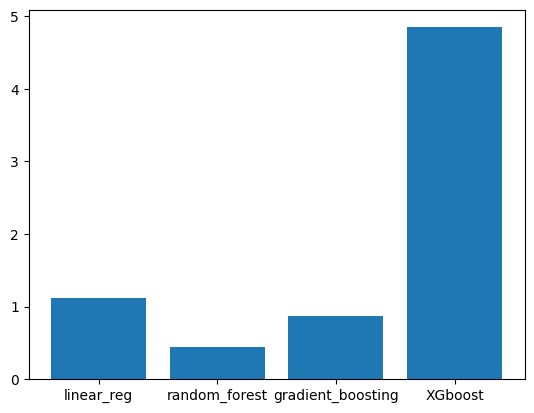

In [136]:
plt.bar(model_name, [linear_reg_mse, random_forest_mse, gradient_boosting_mse, XGboost_mse])

The random_forest_regression model gives the lowest loss out of the 3